# Project 1: Approximations
**Gavela Maculuve**

Add of the imports below

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Assume
$$f(x) = \frac{1}{e^{x^2}}$$

Plot the loglog of the error of the 3 different approximations of the derivative of `f` at the point `x=1` as a function of `h` where `h` is in the range `[10^{-1}, 10^{-2},10^{-3},10^{-4}]`.   

What is the slope of each of the 3 approximations? Which one is the best?




This function can be changed to:
$$f(x) = \frac{1}{e^{x^2}} = e^{-x^2}$$

The function's derivative:
$$f'(x) = -2x \times e^{-x^2}$$

In [23]:
# defining the function f(x)
def f(x: int) -> float:
    '''
    Returns the value of f(x) for the function e^(-x^2)
    
    Args:
        x (int): input number
        
    Returns:
        The value of the function

    Example:
    >>>>> print(f(1))
    >>>>> 0.36787944117144233
    '''
    return np.exp(-x**2)

In [24]:
# defining the derivative function f'(x)
def fprime_true(x:int) -> float:
    '''
    Returns the derivative of the function 1/e^(x^2)
    Args:
        x (integer): input number
    Returns:
        The derivative value

    Example:
    >>>>> print(derivative(1))
    >>>>> -0.7357588823428847
    '''
    return -2*x*np.exp(-x**2)

In [25]:
# Creating the variables used for the computation
x = 1
exact_val = fprime_true(x)

# This computes our h_values, that will be used later on
h = np.array([10**(-i) for i in range(1, 5)])

In [26]:
# computing all three approximations (left, center, right)
left_approx = (f(x)-f(x-h))/h
center_approx = (f(x+h)-f(x-h))/(2*h)
right_approx = (f(x+h)-f(x))/h

In [27]:
# computing the error for each approximation using the value of f'(1) 
left_error = np.abs(exact_val - left_approx)
center_error = np.abs(exact_val - center_approx)
right_error = np.abs(exact_val - right_approx)

##### What is the slope of each of the 3 approximations? Which one is the best?

In [28]:

# computing the slopes using a log fit

# I used np.polyfit to find a mathematical function that describes the relationship between our data points.
# np,polyfit(x, y, degree = linear_function)
slope_left, _ = np.polyfit(np.log10(h), np.log10(left_error), 1)
slope_right, _ = np.polyfit(np.log10(h), np.log10(right_error), 1)
slope_center, _ = np.polyfit(np.log10(h), np.log10(center_error), 1)

print("The slope for each of the 3 approximations")
print(f"\tLeft slope ≈ {slope_left:.3f}")
print(f"\tCenter slope ≈ {slope_center:.3f}")
print(f"\tRight slope ≈ {slope_right:.3f}")

The slope for each of the 3 approximations
	Left slope ≈ 0.990
	Center slope ≈ 2.000
	Right slope ≈ 1.008


The best one is the centered approximation. This is because it is second-order accurate while the left and right differences are only first-order accurate. This means that centered approximation produces smaller error and goes converges as h to 0.


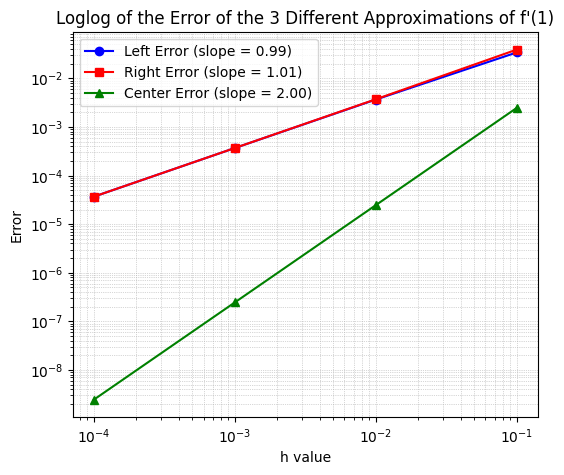

In [29]:
# plotting the graph
plt.figure(figsize=(6,5))

plt.loglog(h, left_error, 'o-', label=f'Left Error (slope = {slope_left:.2f})', color ='blue',)
plt.loglog(h, right_error, 's-',  label=f'Right Error (slope = {slope_right:.2f})', color ='red',)
plt.loglog(h, center_error, '^-', label=f'Center Error (slope = {slope_center:.2f})', color ='green',)

plt.xlabel("h value")
plt.ylabel("Error")
plt.legend()

plt.title("Loglog of the Error of the 3 Different Approximations of f'(1)")
plt.grid(True, which="both", ls=":", linewidth = 0.5)
plt.show()

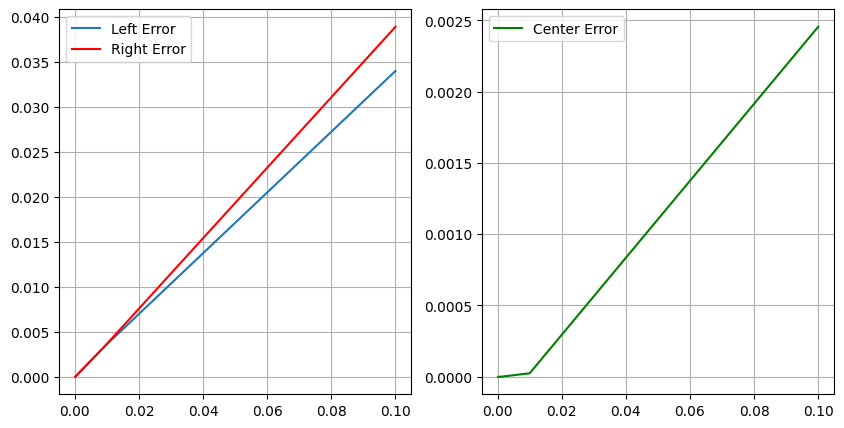

In [30]:
# closer look into the graphs
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(h, left_error, label='Left Error')
ax[0].plot(h, right_error, label='Right Error', color='red')
ax[0].grid()
ax[0].legend()

ax[1].plot(h, center_error, 'g',label='Center Error')
ax[1].grid()
ax[1].legend()

## Exercise 2
1. Write a function that approximates the value of any function `f` at the points `x`. Your function takes into arguments a function and the arrays of the points.
2. Test your function on the following function and plot its derivative.

$$f(x) = \frac{1}{e^{x^2}}\ln(2x^2+1)$$
$$f'(x) = e^{-x^2}\left(\frac{4x}{2x^2+1} - 2x\ln(2x^2+1)\right)$$

In [31]:
def approx_derivative(f: callable, x_points: np.array, h: float, approximation: str) -> np.array:
    '''
    Return an approximation of the derivative of a function f at given points 
    using the three types of approximation (left, central, and right)

    Args:
        f (callable): a function
        x_points (array): points where the derivative should be evaluated
        h (float): step size for finite difference
        approximation (str): 'l'='left', 'r'='right', or 'c'='center'

    Returns:
        np.array: approximations derivative values
    '''
    
    x_points = np.array(x_points, dtype= 'float')
    
    if approximation in ['c','center']:
        return (f(x_points+h)-f(x_points-h))/(2*h)
    elif approximation in ['l', 'left']:
        return (f(x_points)-f(x_points-h))/h
    elif approximation in ['r', 'right']:
        return (f(x_points+h)-f(x_points))/h
    else:
        raise ValueError("You need to choose between: left (l), right (r), center (c)")

In [32]:
def linear_approx(f: callable, a: float, x: np.array, h: float = 0.001, approximation: str = 'c') -> np.array:
    '''
    Linear approximation (tangent line) of f at x using point a

    Args:
        f (callable): function of one variable.
        a (float): points where f should be evaluated.
        x (np.array): target point(s).
        h (float): step size for finite difference.
        approximation (str): 'l'='left', 'r'='right', or 'c'='center'
        
    Returns:
        np.array: linear approximation values of f(x)
    '''
    # slope at a
    fa = f(a)
    f_prime = approx_derivative(f, [a], h, approximation)[0]
    
    return fa + f_prime * (np.array(x)-a)


#### Testing the Function

In [33]:
# Defining the function and its derivative.
def f(x):
    return np.exp(-x**2)*np.log(2*x**2+1)

def exact_fprime(x):
    return np.exp(-x**2) * ((4*x)/(2*x**2 + 1) - 2*x*np.log(2*x**2 + 1))

In [34]:
approximated_val = linear_approx(f, a=1.0, x=2.0, h=0.001, approximation="center")

print("Linear Approximation (a = 1, x = 2) ≈", approximated_val)
print("Exact value (x = 2) ≈", f(2.0))
print("\n")

xvals = [1.0,2.0,3.0,4.0]
approximated_values = linear_approx(f, 1.0, xvals, h=0.001, approximation="center")
print("Linear Approximation (a = 1, x = [1,5]) ≈", approximated_values)
print("Exact values (x_values (1-4)) ≈", f(np.array(xvals)))

Linear Approximation (a = 1, x = 2) ≈ 0.08634993385404954
Exact value (x = 2) ≈ 0.04024357191594178


Linear Approximation (a = 1, x = [1,5]) ≈ [ 0.40415687  0.08634993 -0.23145701 -0.54926395]
Exact values (x_values (1-4)) ≈ [4.04156875e-01 4.02435719e-02 3.63372638e-04 3.93480089e-07]


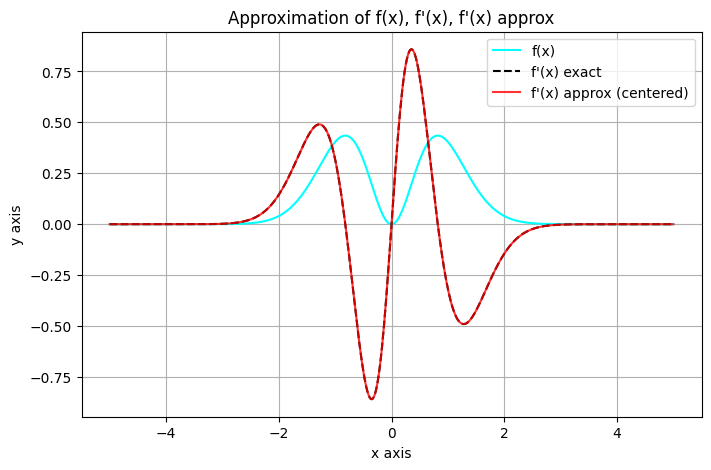

In [35]:
# Generate x values
x = np.linspace(-5, 5, 500)   # 200 points from -3 to 3

# Approximate derivative using centered difference
fprime_approx = approx_derivative(f, x, h=0.001, approximation="center")

plt.figure(figsize=(8,5))
plt.plot(x, f(x), label="f(x)", color="cyan")
plt.plot(x, exact_fprime(x), label="f'(x) exact", color="black", linestyle = '--')
plt.plot(x, fprime_approx, label="f'(x) approx (centered)", color="red", alpha=0.8)

plt.title("Approximation of f(x), f'(x), f'(x) approx")
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()
plt.grid()
plt.show()

## Exercise 3

Below are the Global inflation rate from 2000 to 2024

In [36]:
x = np.array([2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])
       
y = np.array([4.97, 4.64, 3.71, 3.87, 3.94, 3.94, 4.14, 6.28, 2.62, 3.6 , 4.94,
       3.98, 3.52, 3.16, 2.71, 3.23, 3.63, 3.5 , 3.25, 4.65, 8.61, 6.63,
       5.67])

In [37]:
# Create a linear approximation function. This will allows us to efficiently use the the formula.
def linear_approximation(x: int, x1: int, x2: int, y1: float, y2: float) -> float:
    '''
    Calculates y-value (inflation rate) using linear approximation
    
    Args:
        x: The x-coordinate of the point to interpolate.
        x1: The x-coordinate of the first known point.
        y1: The y-coordinate of the first known point.
        x2: The x-coordinate of the second known point.
        y2: The y-coordinate of the second known point.

  Returns:
    The interpolated y-value corresponding to x.
    '''
    return y1 + (x-x1) * (y2-y1)/(x2-x1)

1. Approximate the inflation rate at the year 2004

In [38]:
year_2004 = linear_approximation(2004, x[3], x[4],y[3],y[4])
print(f'Inflation rate at the year 2004 ≈ {year_2004:.2f}%')

Inflation rate at the year 2004 ≈ 3.91%


2. Approximate the inflation rate at the year 2016

In [39]:
year_2016 = linear_approximation(2016, x[14], x[15],y[14],y[15])
print(f'Inflation rate at the year 2016 ≈ {year_2016:.2f}%')

Inflation rate at the year 2016 ≈ 2.97%


3. Approximate the inflation rate at the year 2025

In [40]:
year_2025 = linear_approximation(2025, x[21], x[22],y[21],y[22])
print(f'Inflation rate at the year 2025 ≈ {year_2025:.2f}%')

Inflation rate at the year 2025 ≈ 4.71%



4. Using the rate you approximated for 2025, approximate the rates for the next 5 years (2026-2030)

In [41]:
# since our lasts points are the year 2024 and its inflation rate, 
# we will use that to approximate the rest of the years.
x1, y1 = x[-1], y[-1]
x2, y2 = 2025, year_2025

In [42]:
# empty dictionary
future_rates = {}

# for loop that approximates the inflation rates according to the year it is
for year in range(2026, 2031):
    future_rates[year] = linear_approximation(year, x1, x2,y1, year_2025)

# printing the years and their respective inflation rates
print("Approximated Rates (2026-2030)")
for year, rate in future_rates.items():
    print(f"\t{year} ≈ {rate:.2f}%")

Approximated Rates (2026-2030)
	2026 ≈ 3.75%
	2027 ≈ 2.79%
	2028 ≈ 1.83%
	2029 ≈ 0.87%
	2030 ≈ -0.09%
